<a href="https://colab.research.google.com/github/sureshmecad/Google-Colab/blob/master/1_Low_Variance_Threshold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- https://www.scribbr.com/statistics/variance/

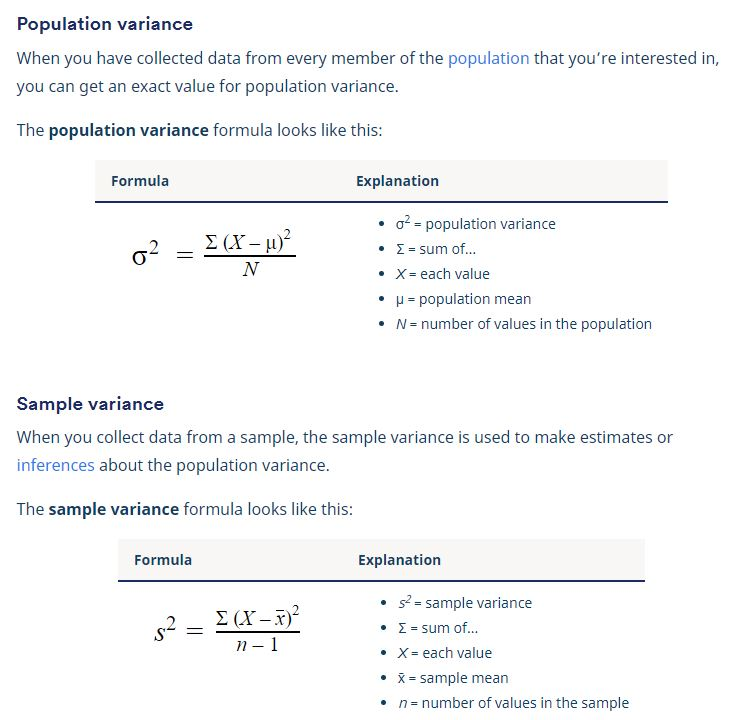

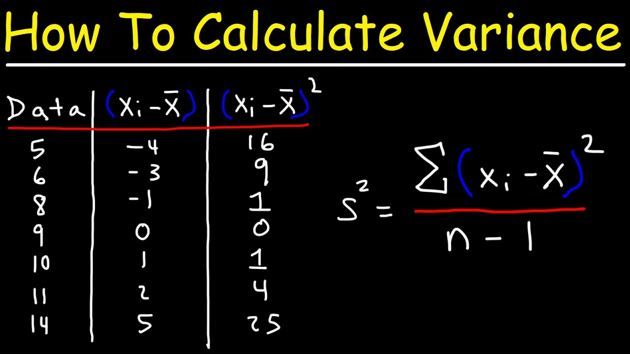

In [ ]:
import numpy as np

dataset = [21, 11, 19, 18, 29, 46, 20]

variance = np.var(dataset)

print(variance)

108.81632653061224


In [ ]:
import statistics

dataset = [21, 11, 19, 18, 29, 46, 20]

output = statistics.variance(dataset)

print(output)

126.95238095238095


-------

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_cleaned.csv to diabetes_cleaned.csv


In [ ]:
import pandas as pd

In [ ]:
# load the csv to dataframe name "diabetes" and print the head values
diabetes = pd.read_csv("diabetes_cleaned.csv")

# display diabetes.head()
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,218.937760,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,70.189298,26.6,0.351,31.0,0
2,8.0,183.0,64.0,29.0,269.968908,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1


In [ ]:
# seperate the features and the target as x and y 
x = diabetes.drop('Outcome', axis = 1)

y = diabetes["Outcome"]

### **Variance**

In [ ]:
# Return  the variance for X along the specified axis=0.
x.var(axis=0)

Pregnancies                   11.354056
Glucose                      929.680350
BloodPressure                146.321591
SkinThickness                 77.285567
Insulin                     9484.259268
BMI                           48.813618
DiabetesPedigreeFunction       0.109779
Age                          138.303046
dtype: float64

In [ ]:
# import minmax_scale
from sklearn.preprocessing import MinMaxScaler
# use minmax scale with feature_range=(0,10) and columns=X.columns,to scale the features of dataframe and store them into X_scaled_df 
scaler = MinMaxScaler(feature_range=(0, 10))                           
X_scaled_df = scaler.fit_transform(x)

In [ ]:
# return X_scaled_df
X_scaled_df = pd.DataFrame(X_scaled_df, columns=x.columns)
X_scaled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3.529412,6.709677,4.897959,3.043478,2.740295,3.149284,2.344150,4.833333
1,0.588235,2.645161,4.285714,2.391304,1.018185,1.717791,1.165670,1.666667
2,4.705882,8.967742,4.081633,2.391304,3.331099,1.042945,2.536294,1.833333
3,0.588235,2.903226,4.285714,1.739130,1.293850,2.024540,0.380017,0.000000
4,0.000000,6.000000,1.632653,3.043478,2.150572,5.092025,9.436379,2.000000
...,...,...,...,...,...,...,...,...
763,5.882353,3.677419,5.306122,4.456522,2.289500,3.006135,0.397096,7.000000
764,1.176471,5.032258,4.693878,2.173913,2.044244,3.803681,1.118702,1.000000
765,2.941176,4.967742,4.897959,1.739130,1.502241,1.635992,0.713066,1.500000
766,0.588235,5.290323,3.673469,2.391304,2.217956,2.433538,1.157131,4.333333


In [ ]:
# Again return  the variance for X along the specified axis=0 to check the scales after using minmax scaler.
X_scaled_df.var(axis=0)

Pregnancies                 3.928739
Glucose                     3.869637
BloodPressure               1.523548
SkinThickness               0.913109
Insulin                     1.271218
BMI                         2.041377
DiabetesPedigreeFunction    2.001447
Age                         3.841751
dtype: float64

### **Variance Threshold**

- Feature Selector that **removes all low-variance features.**

- This feature selection algorithm **looks only at the features (x), not the desired outputs (y)**, and can thus be used for unsupervised learning.

- The **variance threshold** is a simple baseline approach to **feature selection.**

- It **removes** all features which variance doesn’t meet some **threshold**.

- By default, it removes all **zero-variance** features, i.e., features that have the **same value** in all samples. We assume that features with a **higher variance** may contain **more useful information**.

In [ ]:
# from sklearn.feature_selection import VarianceThreshold

# v_Threshold = VarianceThreshold(threshold=0)
# v_Threshold.fit(x)  # fit finds the features with zero variance
# v_Threshold.get_support()

# The get_support returns a Boolean vector where True means that the variable does not have zero variance.

In [ ]:
# import variancethreshold
from sklearn.feature_selection import VarianceThreshold
# set threshold=1 and define it to variable select_features
select_features = VarianceThreshold(threshold=1)

In [ ]:
X_variance_threshold_df= select_features.fit_transform(X_scaled_df)

In [ ]:
#print X_variance_threshold_df
X_variance_threshold_df

array([[3.52941176, 6.70967742, 4.89795918, ..., 3.14928425, 2.3441503 ,
        4.83333333],
       [0.58823529, 2.64516129, 4.28571429, ..., 1.71779141, 1.16567037,
        1.66666667],
       [4.70588235, 8.96774194, 4.08163265, ..., 1.04294479, 2.53629377,
        1.83333333],
       ...,
       [2.94117647, 4.96774194, 4.89795918, ..., 1.63599182, 0.71306576,
        1.5       ],
       [0.58823529, 5.29032258, 3.67346939, ..., 2.43353783, 1.15713066,
        4.33333333],
       [0.58823529, 3.16129032, 4.69387755, ..., 2.49488753, 1.01195559,
        0.33333333]])

In [ ]:
#Convert X_variance_threshold_df into dataframe
X_variance_threshold_df = pd.DataFrame(X_variance_threshold_df)

In [ ]:
# print of head values of X_variance_threshold_df 
X_variance_threshold_df.head()

,0,1,2,3,4,5,6
0,3.529412,6.709677,4.897959,2.740295,3.149284,2.344150,4.833333
1,0.588235,2.645161,4.285714,1.018185,1.717791,1.165670,1.666667
2,4.705882,8.967742,4.081633,3.331099,1.042945,2.536294,1.833333
3,0.588235,2.903226,4.285714,1.293850,2.024540,0.380017,0.000000
4,0.000000,6.000000,1.632653,2.150572,5.092025,9.436379,2.000000


In [ ]:
def get_selected_features(raw_df,processed_df):
    selected_features=[]
    for i in range(len(processed_df.columns)):
        for j in range(len(raw_df.columns)):
            if (processed_df.iloc[:,i].equals(raw_df.iloc[:,j])):
                selected_features.append(raw_df.columns[j])
    return selected_features

In [ ]:
# pass the X_scaled_df as raw_df and X_variance_threshold_df as processed_df inside get_selected_features function
selected_features = get_selected_features(X_scaled_df, X_variance_threshold_df)

# print selected_features
selected_features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
# define selected_features as columns and save it in variabe named X_variance_threshold_df
X_variance_threshold_df.columns= selected_features
#print X_variance_threshold_df
X_variance_threshold_df

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3.529412,6.709677,4.897959,2.740295,3.149284,2.344150,4.833333
1,0.588235,2.645161,4.285714,1.018185,1.717791,1.165670,1.666667
2,4.705882,8.967742,4.081633,3.331099,1.042945,2.536294,1.833333
3,0.588235,2.903226,4.285714,1.293850,2.024540,0.380017,0.000000
4,0.000000,6.000000,1.632653,2.150572,5.092025,9.436379,2.000000
...,...,...,...,...,...,...,...
763,5.882353,3.677419,5.306122,2.289500,3.006135,0.397096,7.000000
764,1.176471,5.032258,4.693878,2.044244,3.803681,1.118702,1.000000
765,2.941176,4.967742,4.897959,1.502241,1.635992,0.713066,1.500000
766,0.588235,5.290323,3.673469,2.217956,2.433538,1.157131,4.333333
